In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msn

# Import the required function for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Import train and test split function
from sklearn.model_selection import train_test_split

# Import packages to calculate performance of the models

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

# To save the model import pickle 
import pickle

In [2]:
data=pd.read_csv('train.csv')
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,Single,2,Senior,Small,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,Single,0,Senior,Medium,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,Married,2,Entry,Small,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,Single,0,Entry,Large,No,No,No,Good,Low,Left


In [3]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

<Axes: >

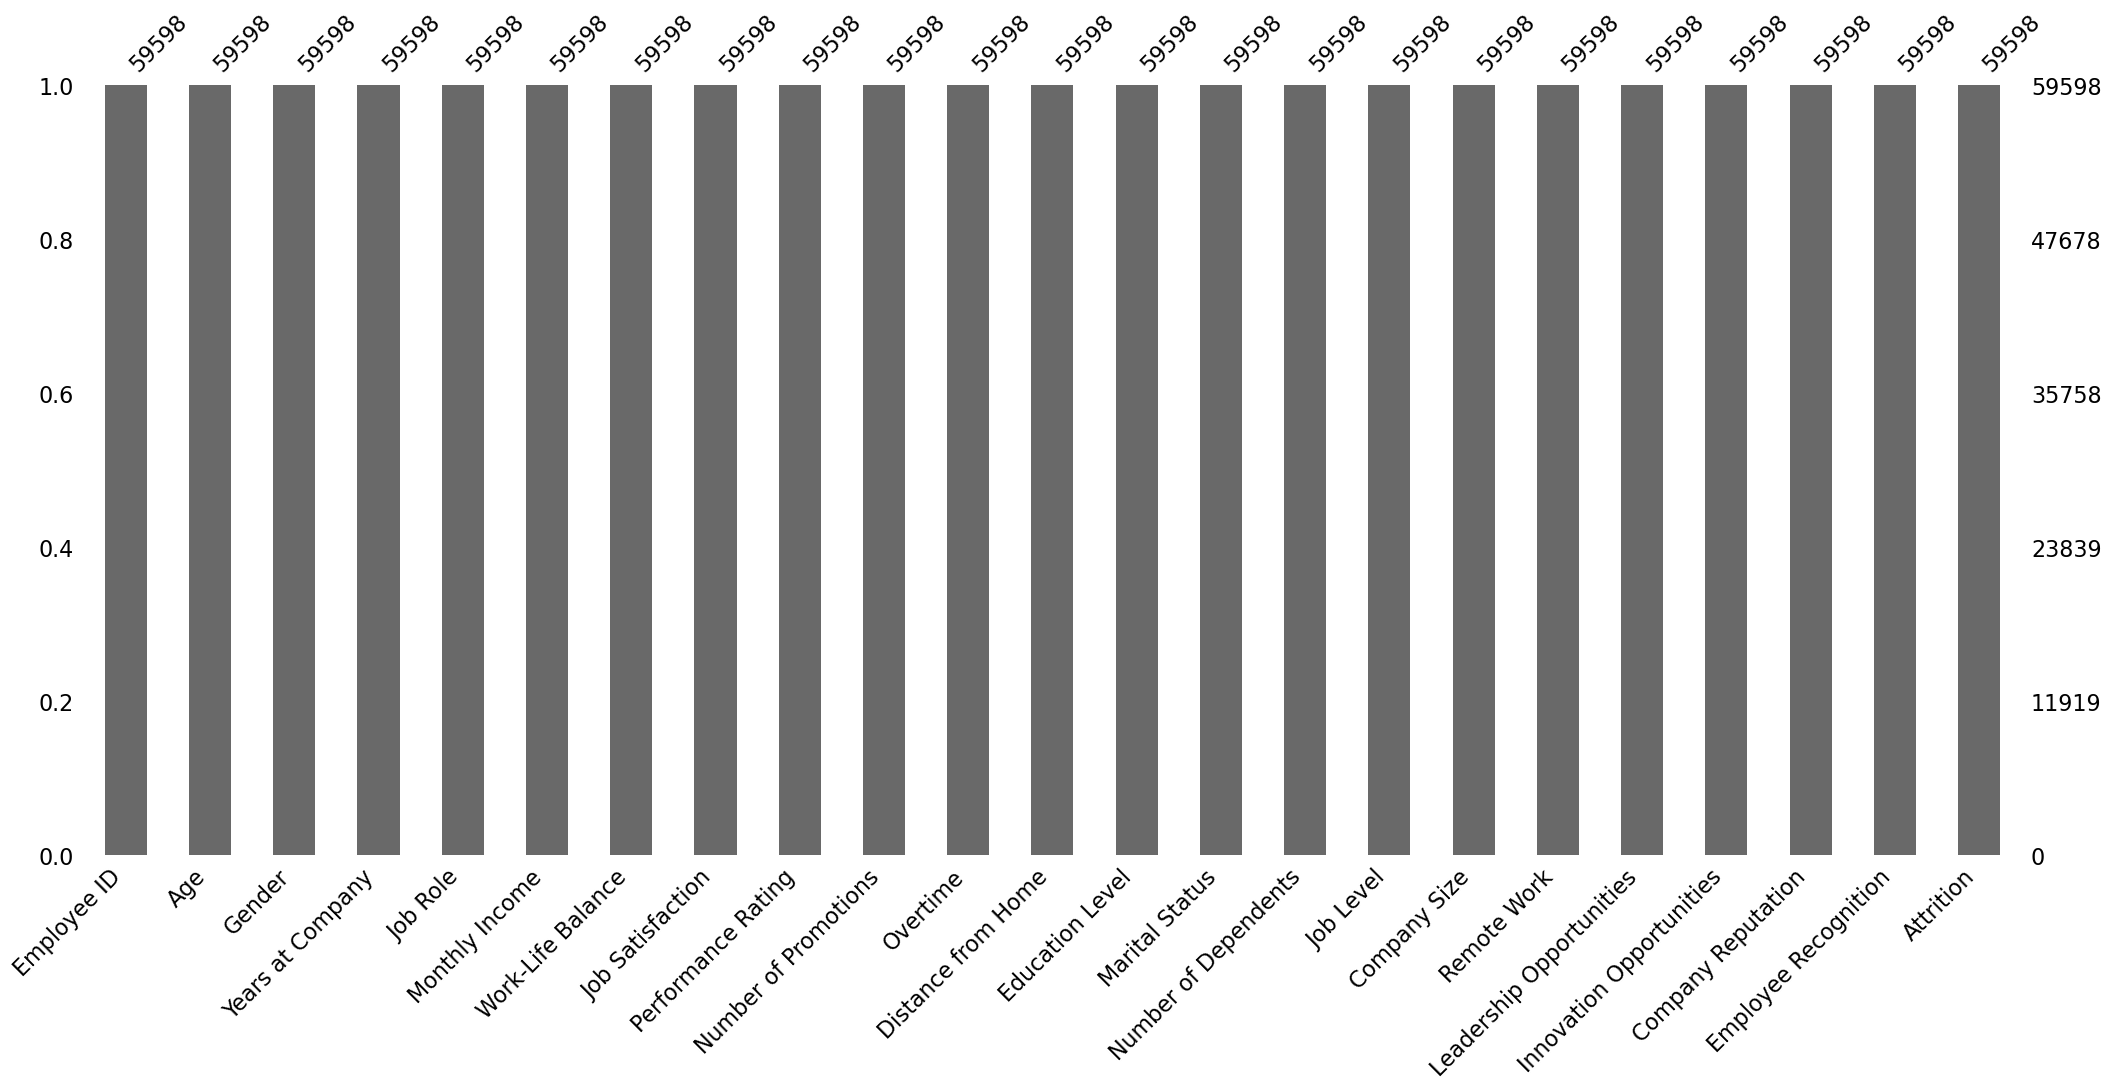

In [5]:
msn.bar(data)

In [6]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [7]:
numerical_feature=[col for col in data.columns if data[col].dtypes!='object']
numerical_feature

['Employee ID',
 'Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents']

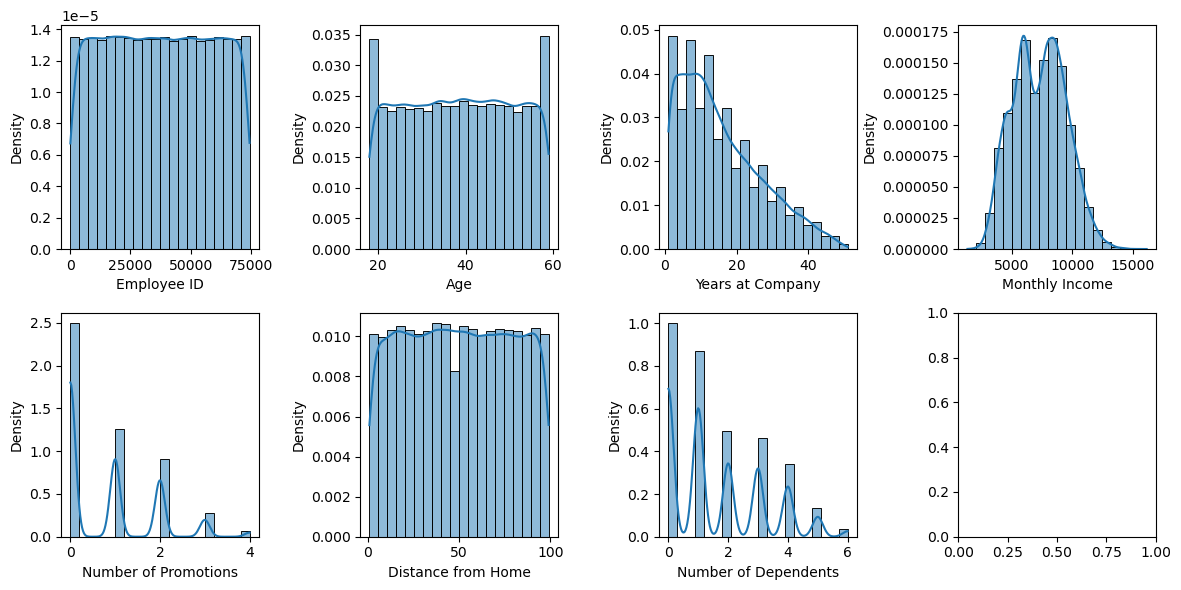

In [9]:
fig, ax = plt.subplots(2,4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(numerical_feature):
    sns.histplot(df[col],kde=True,stat='density',bins=20,ax=ax[i])

plt.tight_layout()
plt.show()

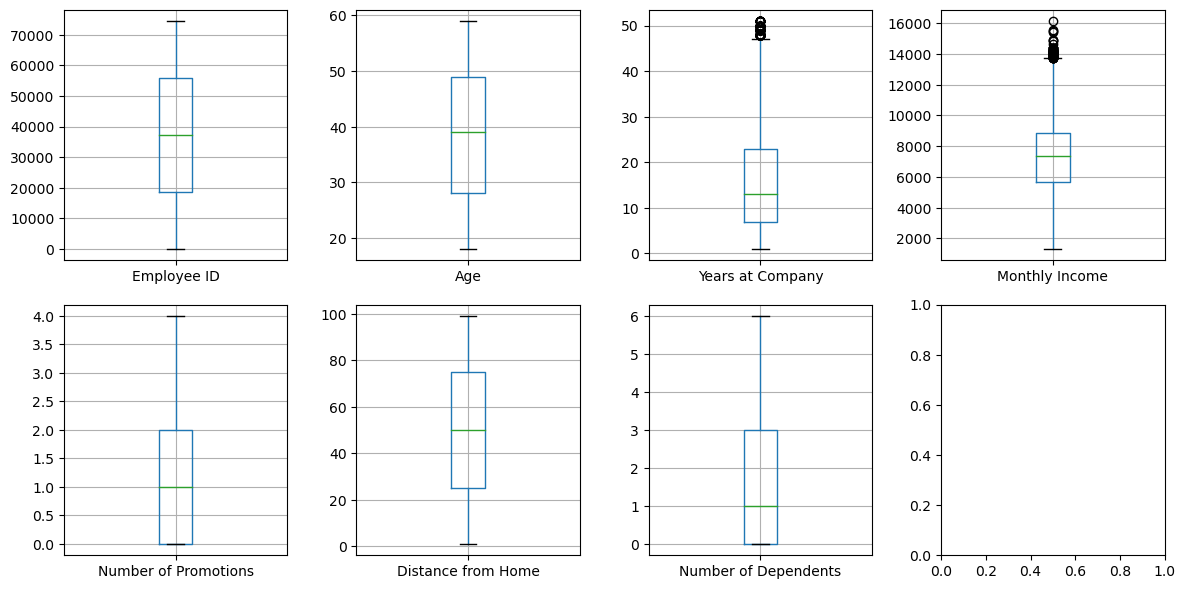

In [52]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(numerical_feature):
    data.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

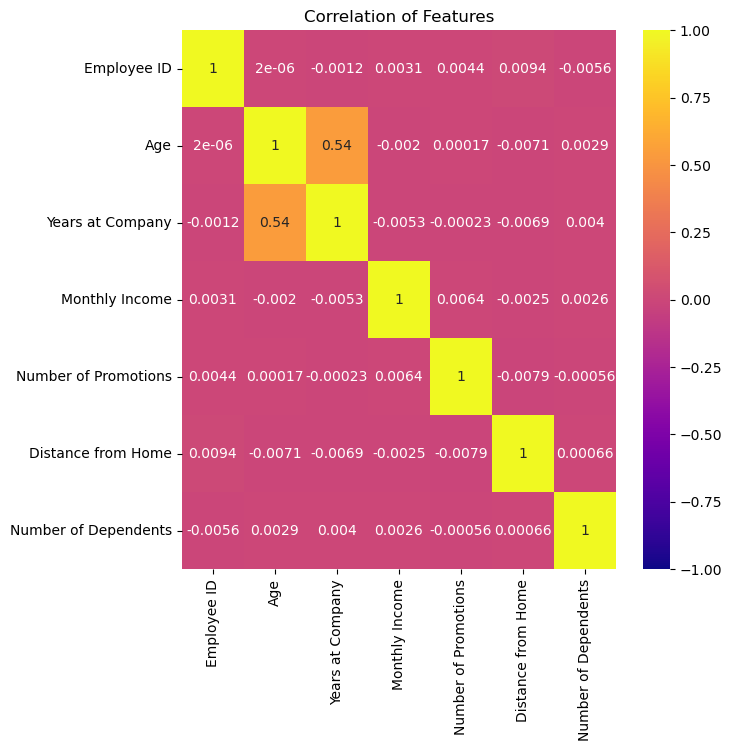

In [53]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of Features', size=12)
ax = sns.heatmap(data[numerical_feature].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [83]:
categorical_feature=[col for col in data.columns if data[col].dtypes=='object']
categorical_feature

[]

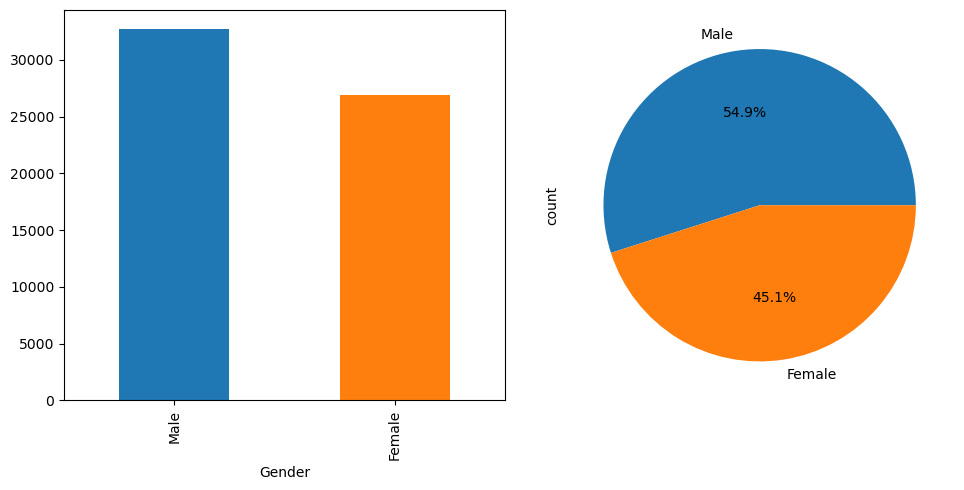

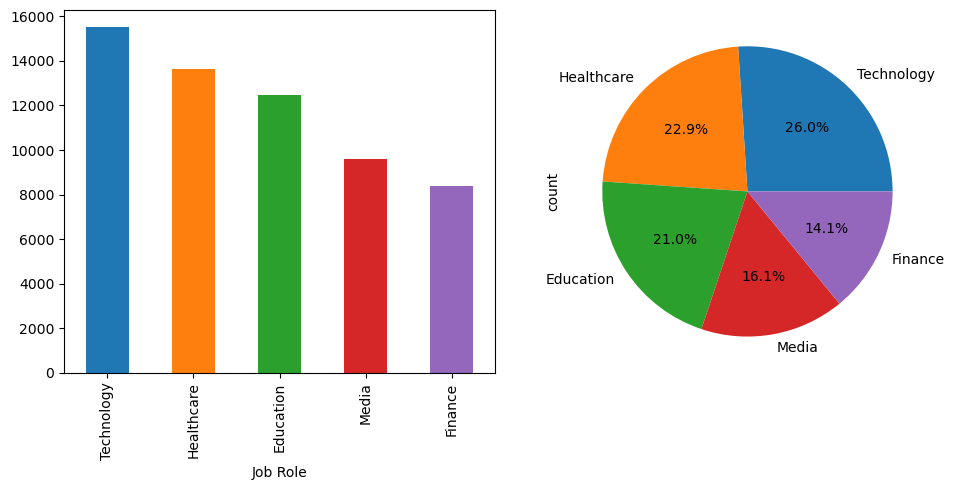

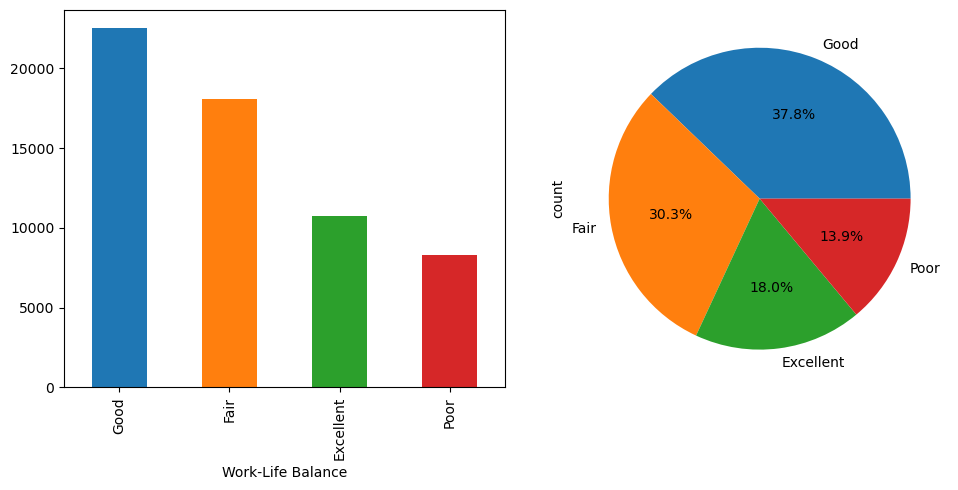

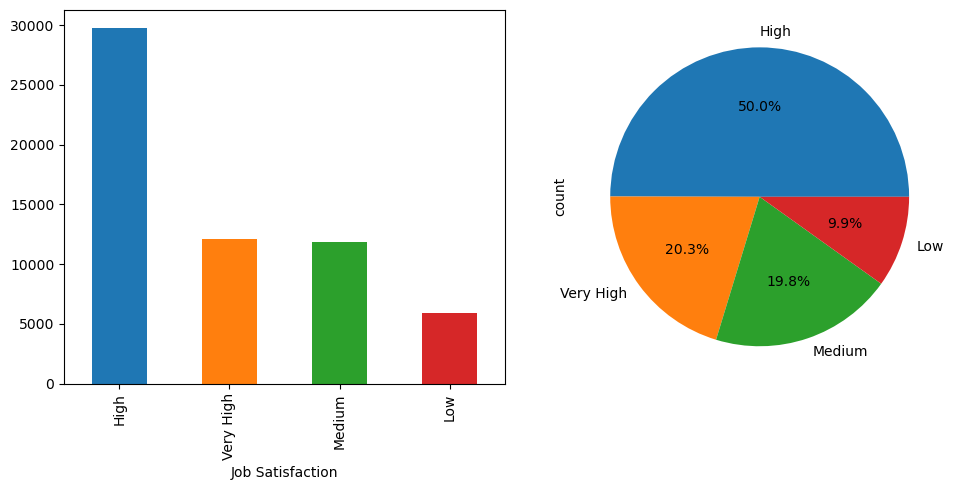

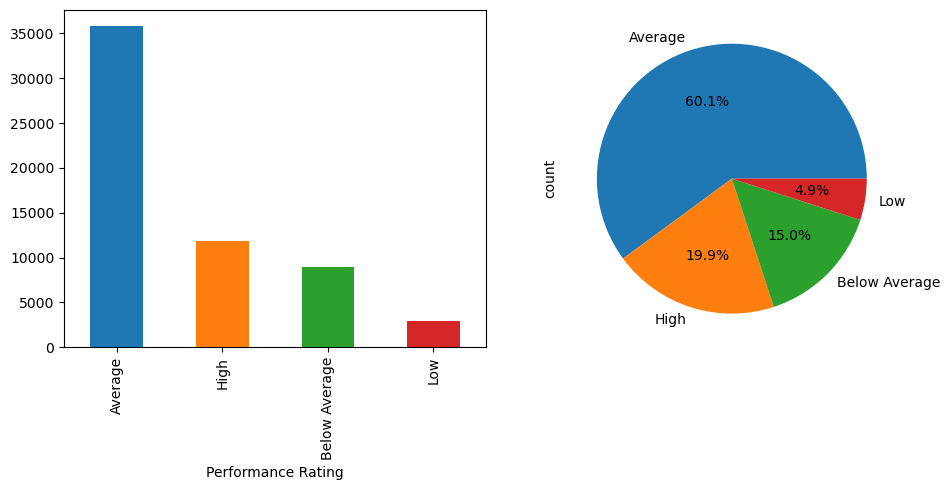

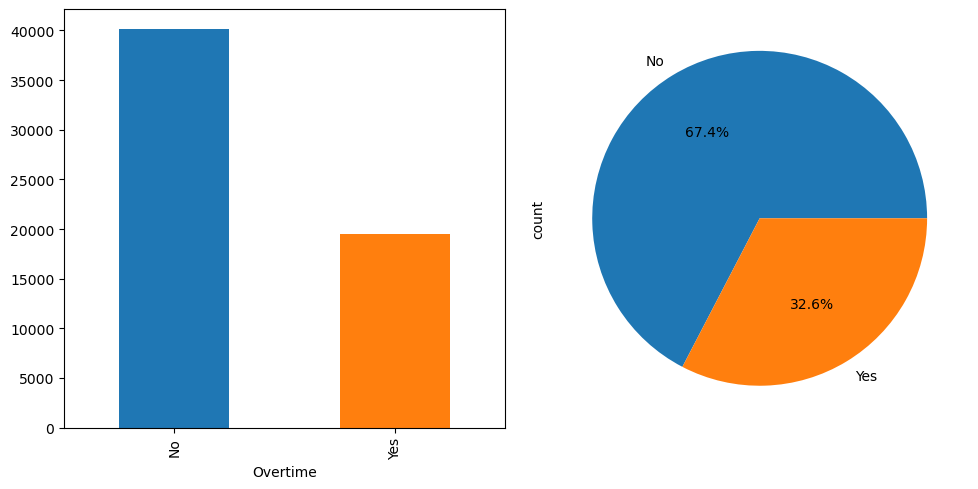

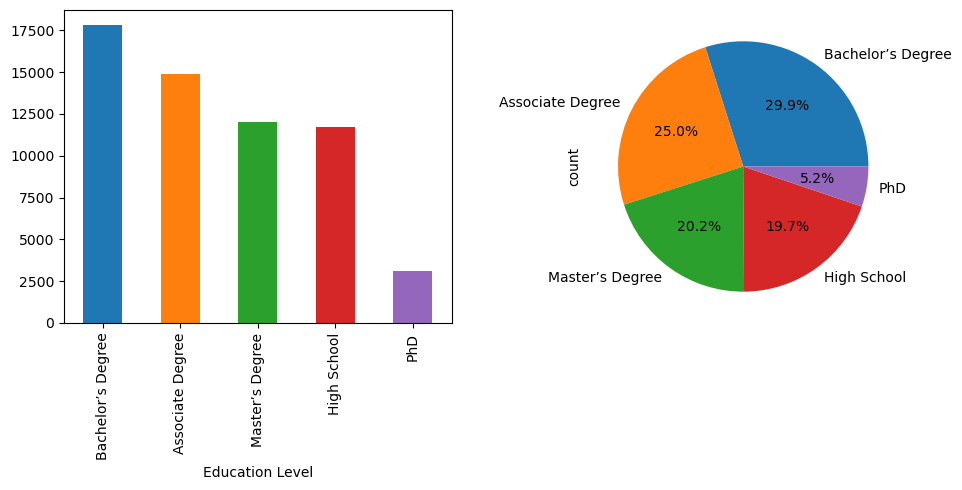

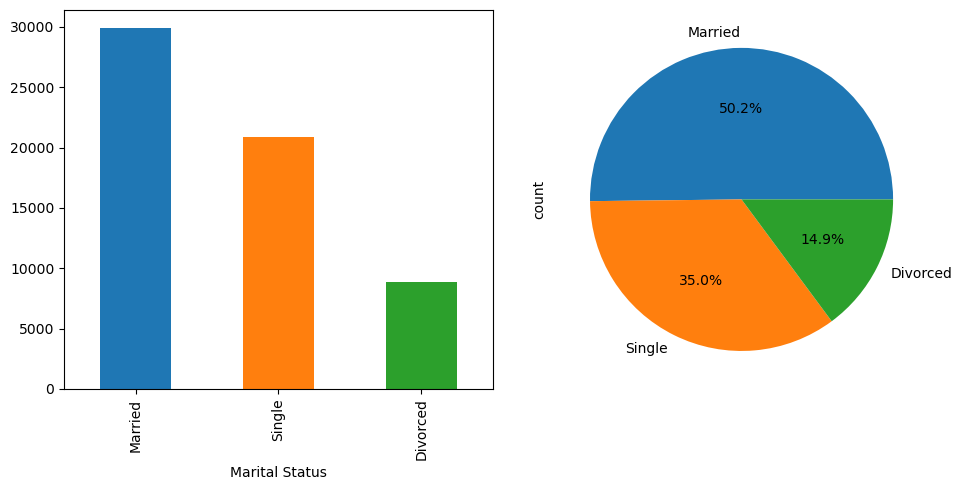

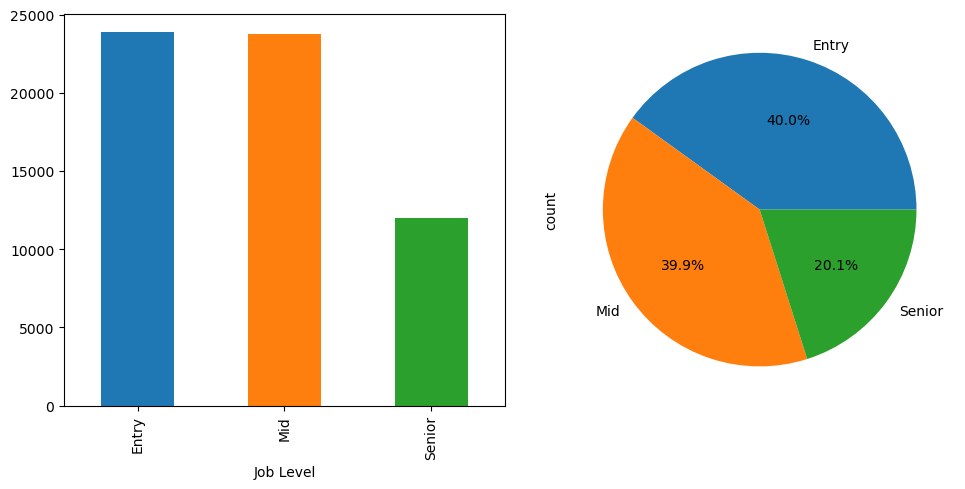

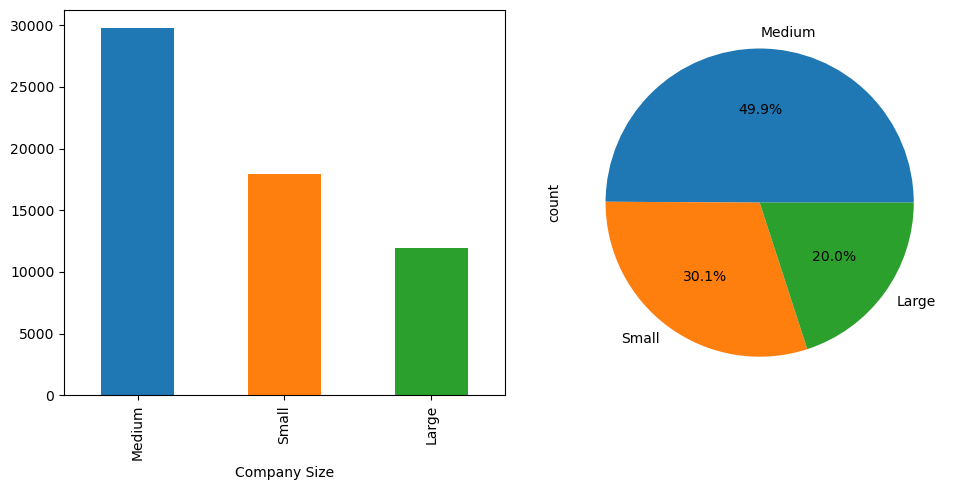

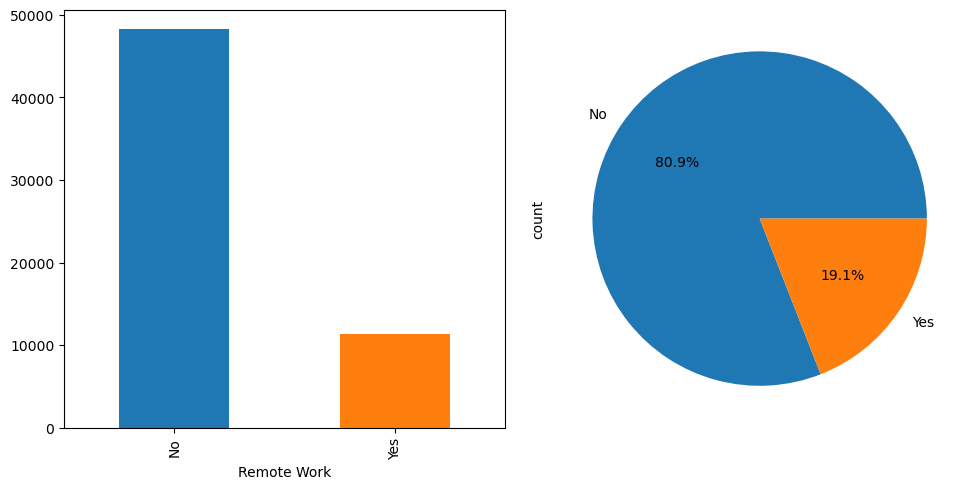

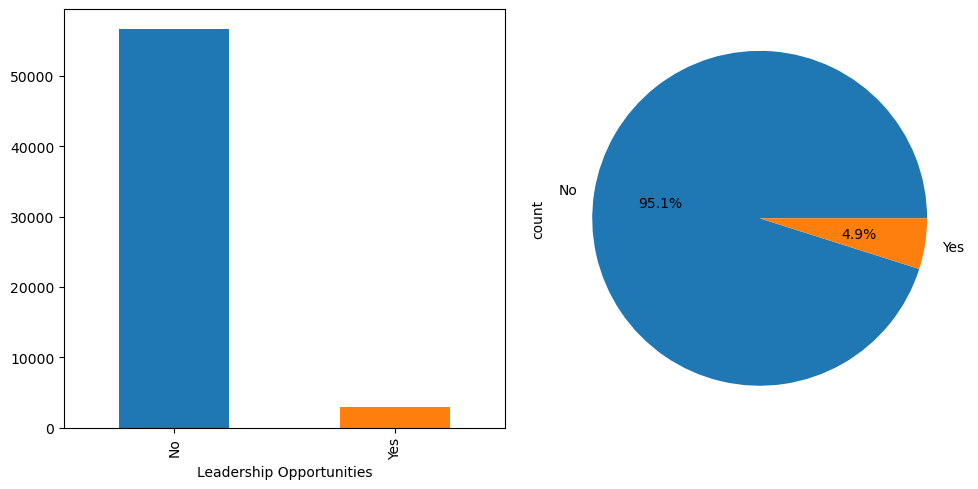

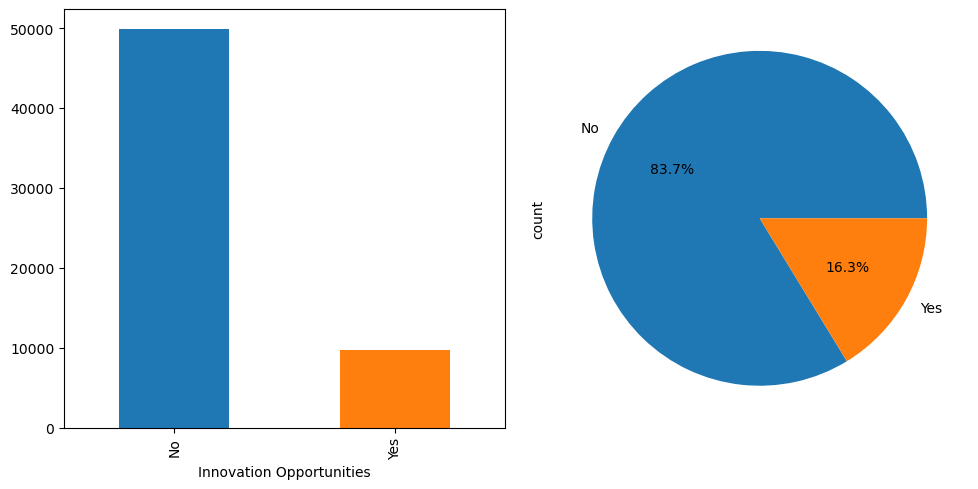

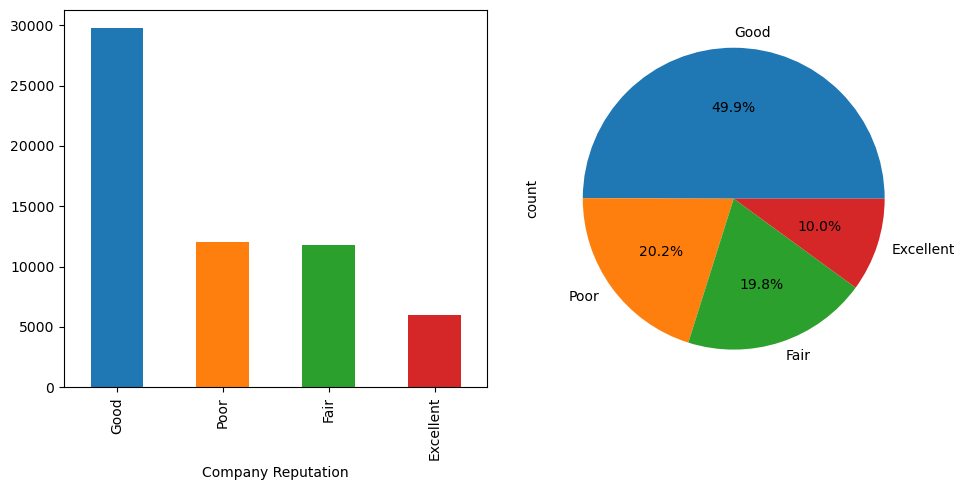

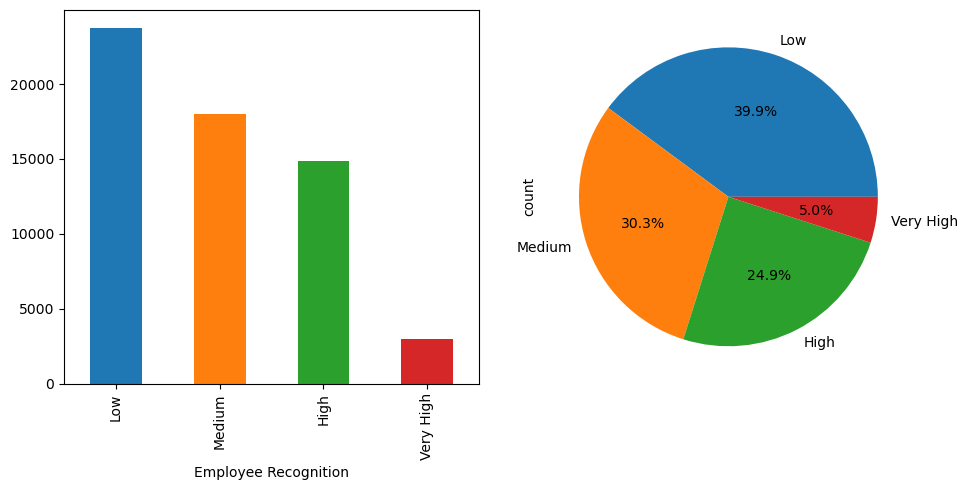

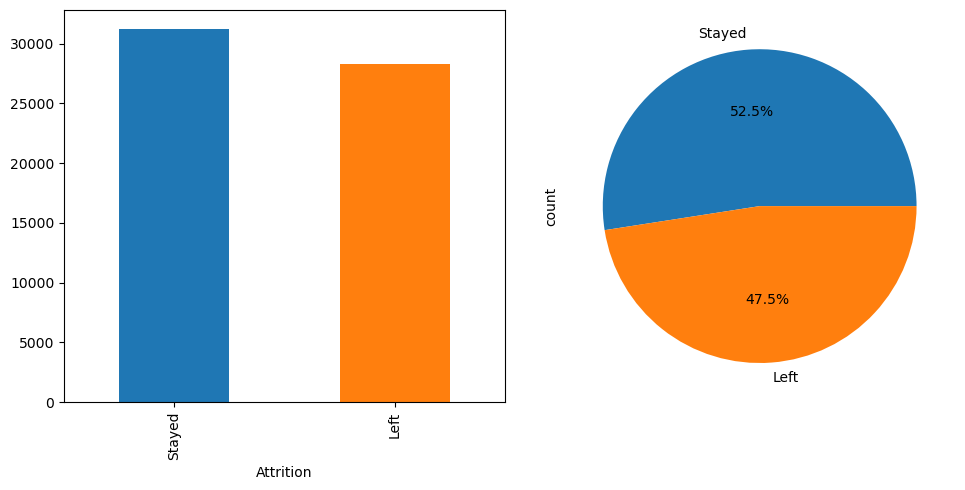

In [55]:
for feature_name in categorical_feature:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    df[feature_name].value_counts().plot(kind='bar', color=sns.color_palette())
    plt.subplot(1, 2, 2)
    data[feature_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Work-Life Balance', ylabel='Count'>

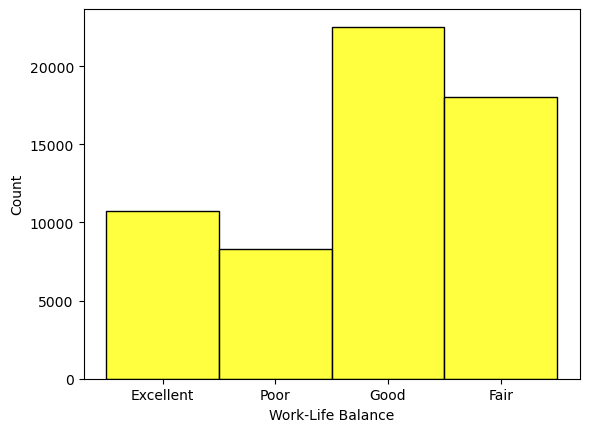

In [56]:
sns.histplot(data=data,x='Work-Life Balance',kde=False,color='yellow')

<Axes: xlabel='Overtime', ylabel='Count'>

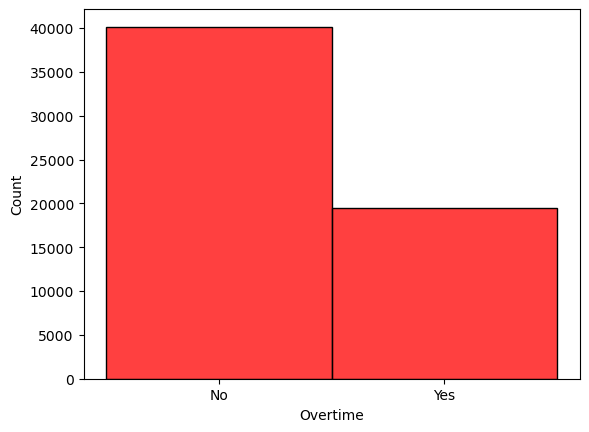

In [26]:
sns.histplot(data=df,x='Overtime',kde=False,color='red')

<Axes: xlabel='Remote Work', ylabel='Count'>

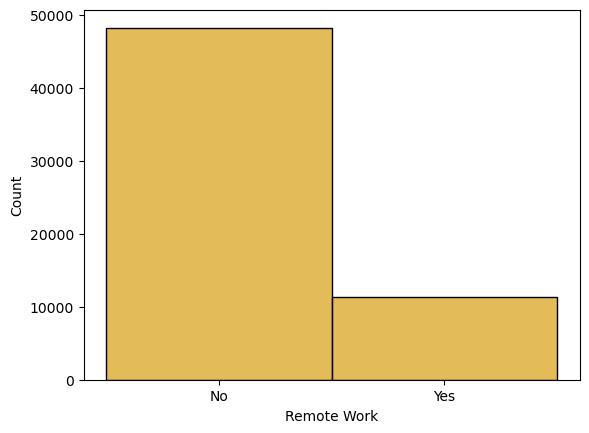

In [27]:
sns.histplot(data=df,x='Remote Work',kde=False,color='goldenrod')

<Axes: xlabel='Leadership Opportunities', ylabel='Count'>

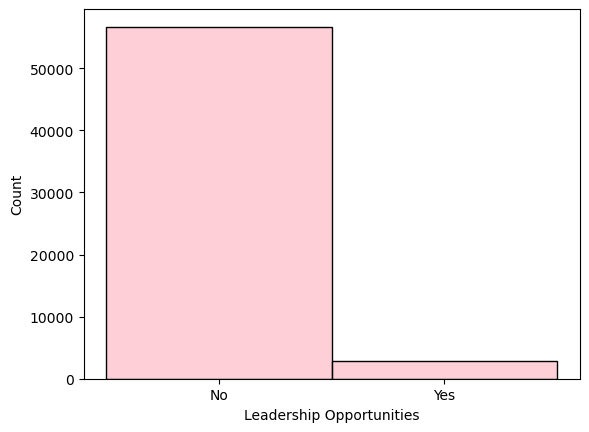

In [28]:
sns.histplot(data=df,x='Leadership Opportunities',kde=False,color='pink')

<Axes: xlabel='Employee Recognition', ylabel='Count'>

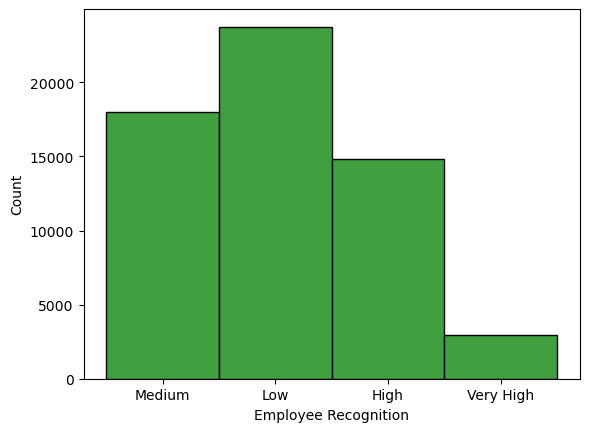

In [29]:
sns.histplot(data=df,x='Employee Recognition',kde=False,color='green')

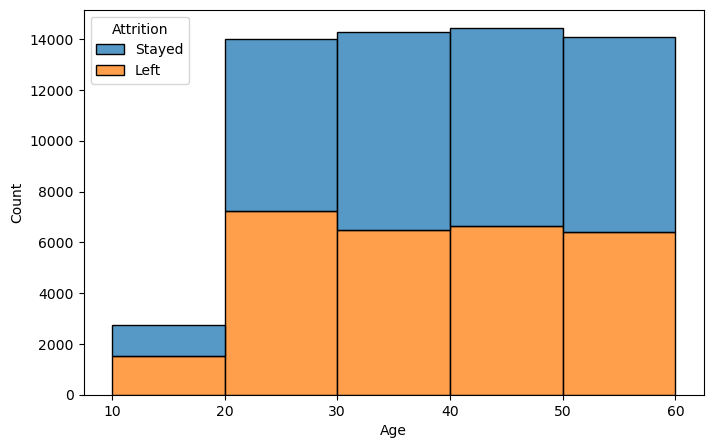

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=[10,20,30,40,50,60])
plt.show()

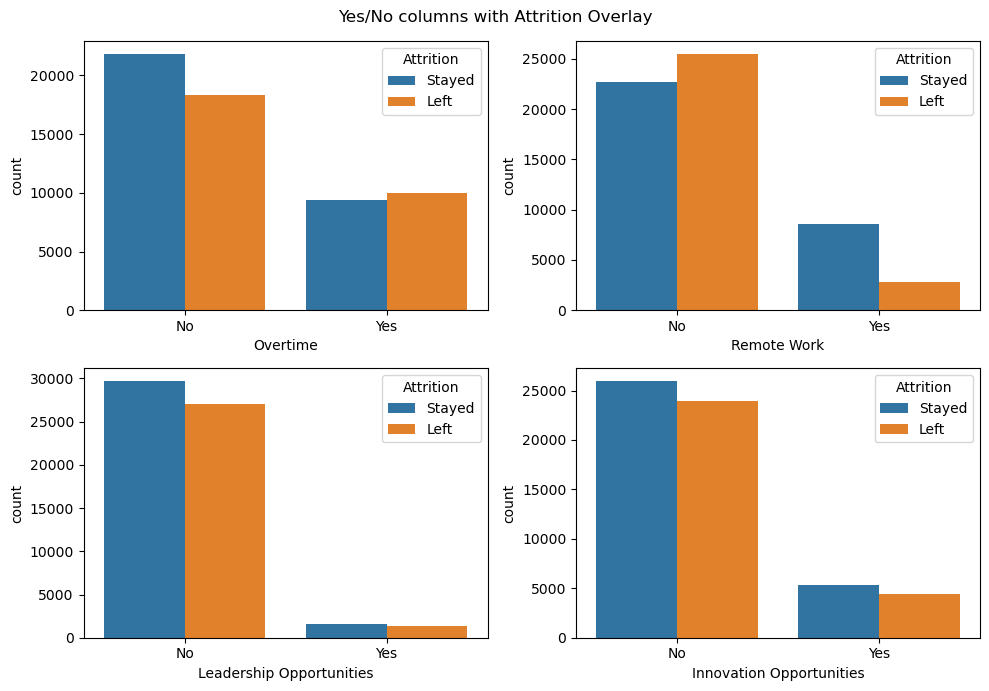

In [32]:
yes_no_columns = []
for col in categorical_feature :
    if set(df[col].unique()) == {'Yes', 'No'}:
        yes_no_columns.append(col)
        
i = 1
plt.figure(figsize=(10,7))
for col in yes_no_columns:
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col, hue='Attrition')
    i += 1

plt.suptitle('Yes/No columns with Attrition Overlay')
plt.tight_layout()
plt.show()

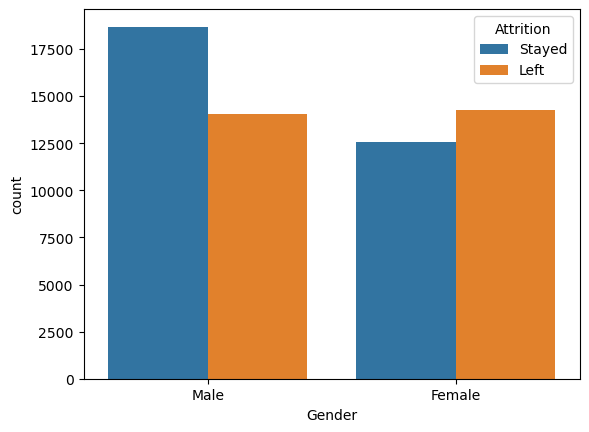

In [33]:
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.show()

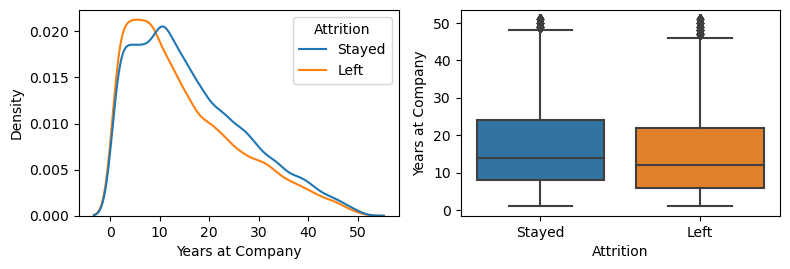

In [35]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.kdeplot(data=df, x='Years at Company', hue='Attrition')
plt.subplot(2,2,2)
sns.boxplot(data=df, y='Years at Company', x='Attrition')
plt.tight_layout()
plt.show()

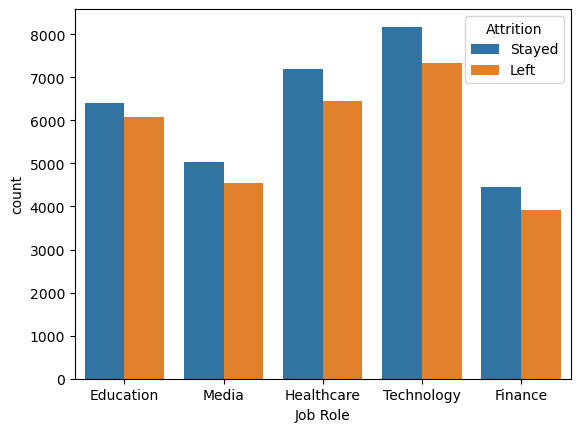

In [36]:
sns.countplot(data=df, x='Job Role', hue='Attrition')
plt.show()


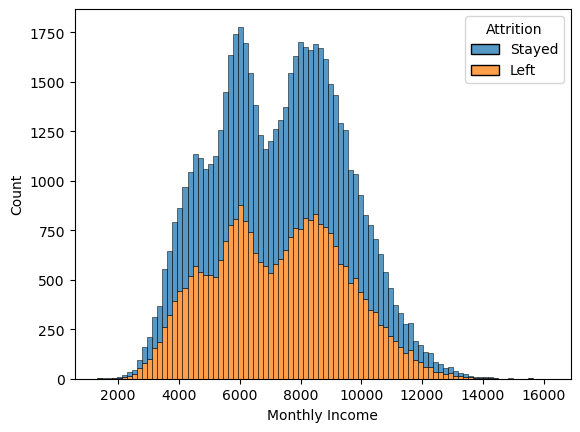

In [37]:
sns.histplot(data=df, x='Monthly Income', hue='Attrition', multiple='stack')
plt.show()


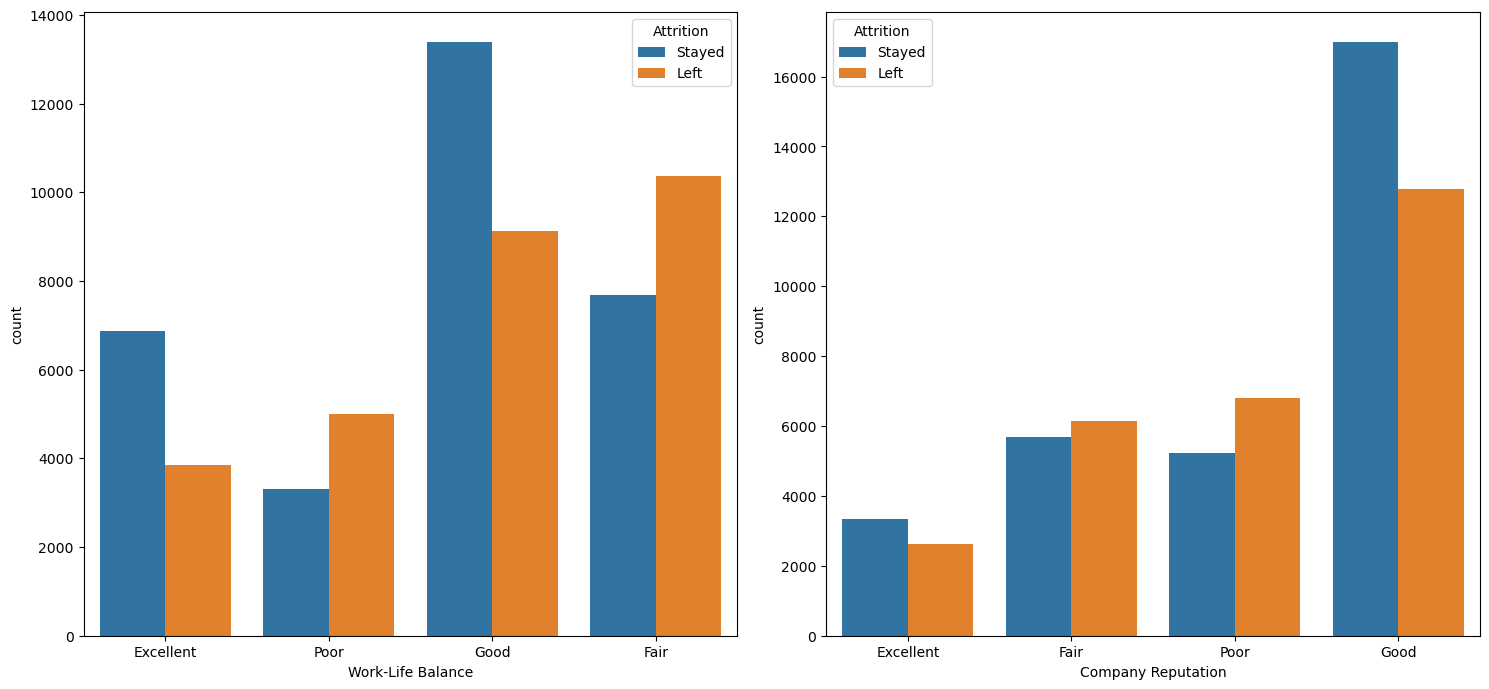

In [38]:
epgf_cols = []
for col in categorical_feature :
    if set(df[col].unique()) == {'Excellent', 'Poor','Good', 'Fair'}:
        epgf_cols.append(col)
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df, x=epgf_cols[0], hue='Attrition')

plt.subplot(1,2,2)
sns.countplot(data=df, x=epgf_cols[1], hue='Attrition')

plt.tight_layout()
plt.show()

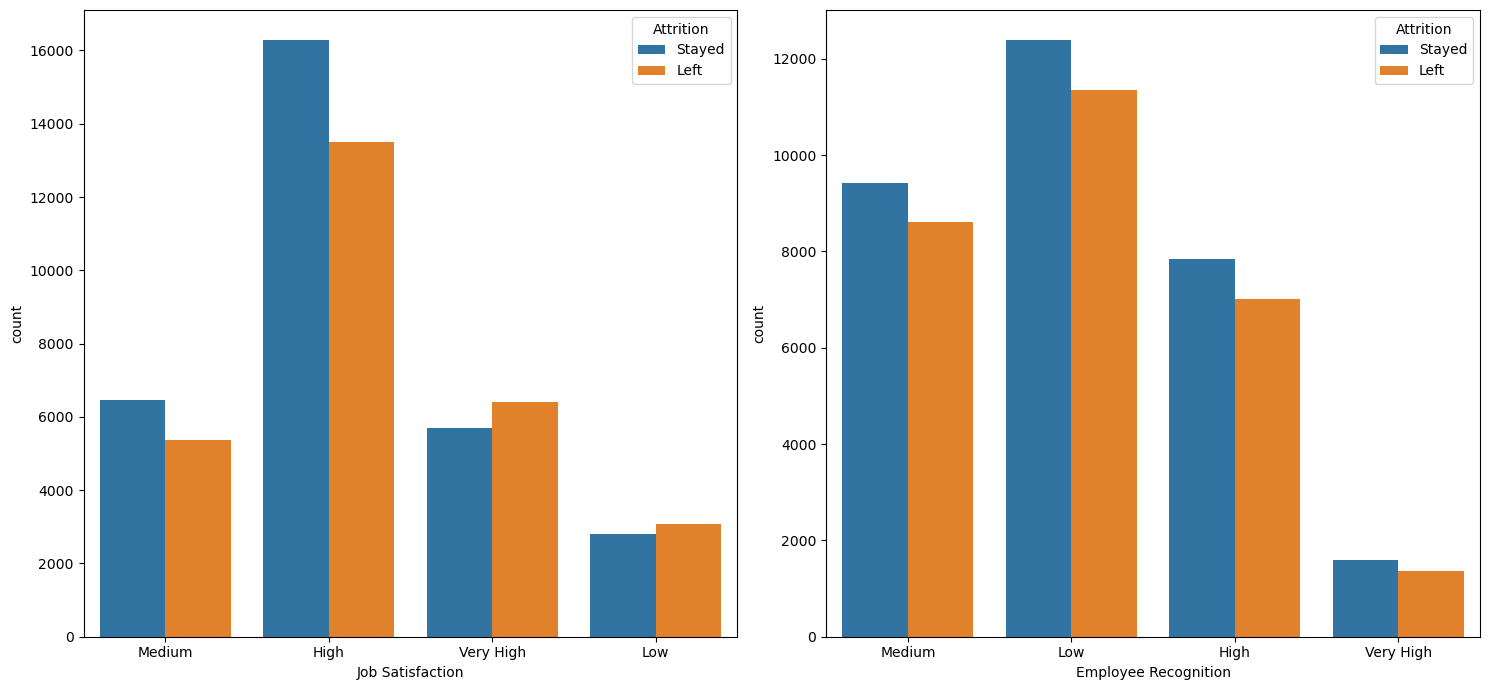

In [39]:
mhvl_cols = []
for col in categorical_feature :
    if set(df[col].unique()) == {'Medium', 'High','Very High', 'Low'}:
        mhvl_cols.append(col)
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df, x=mhvl_cols[0], hue='Attrition')

plt.subplot(1,2,2)
sns.countplot(data=df, x=mhvl_cols[1], hue='Attrition')

plt.tight_layout()
plt.show()

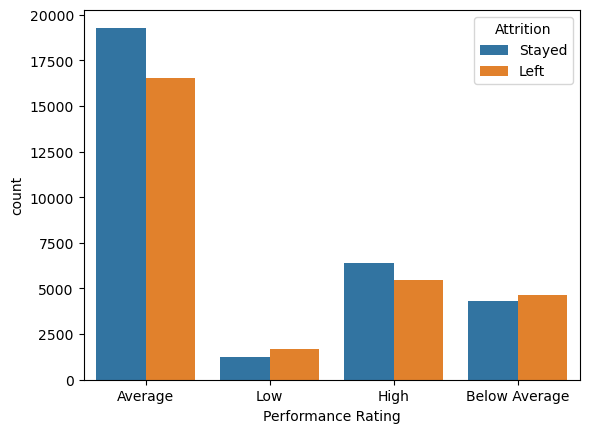

In [40]:
sns.countplot(data=df, x='Performance Rating', hue='Attrition')
plt.show()


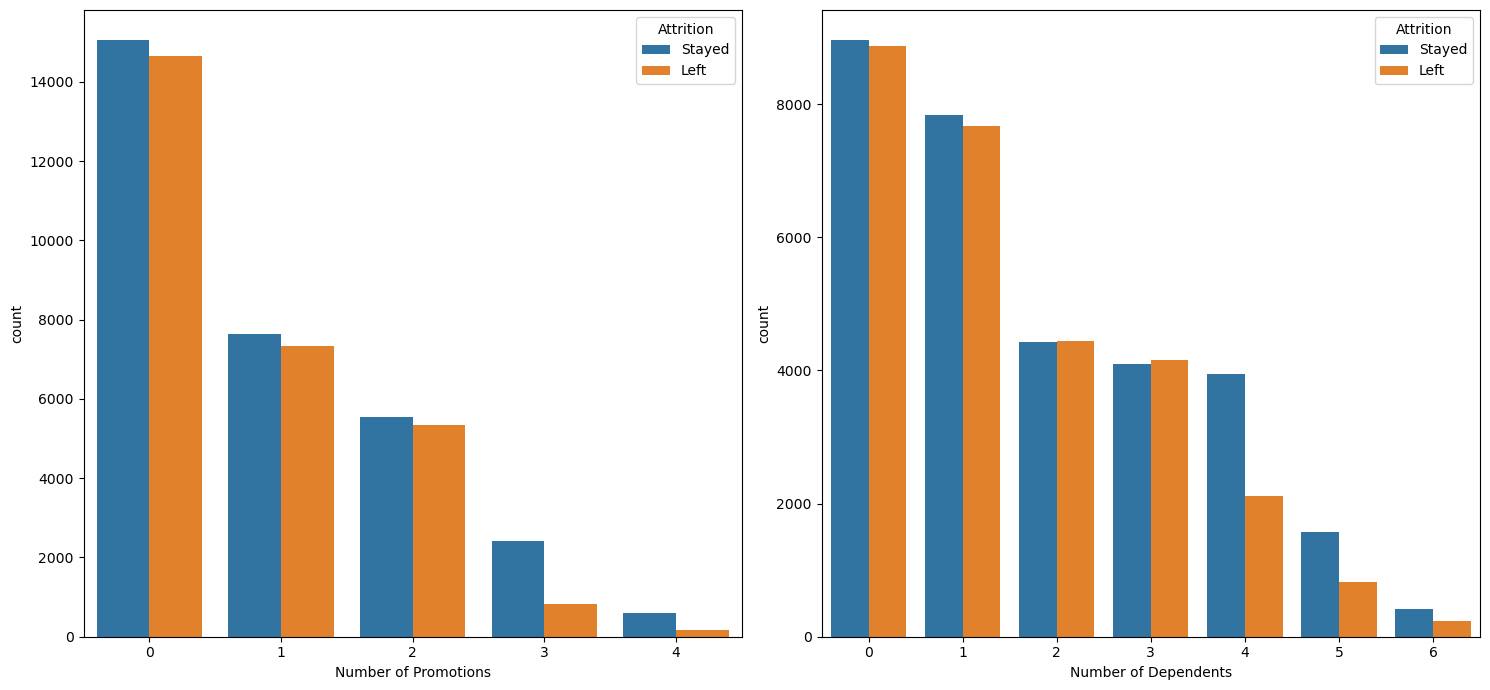

In [41]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df, x='Number of Promotions', hue='Attrition')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Number of Dependents', hue='Attrition')

plt.tight_layout()
plt.show()


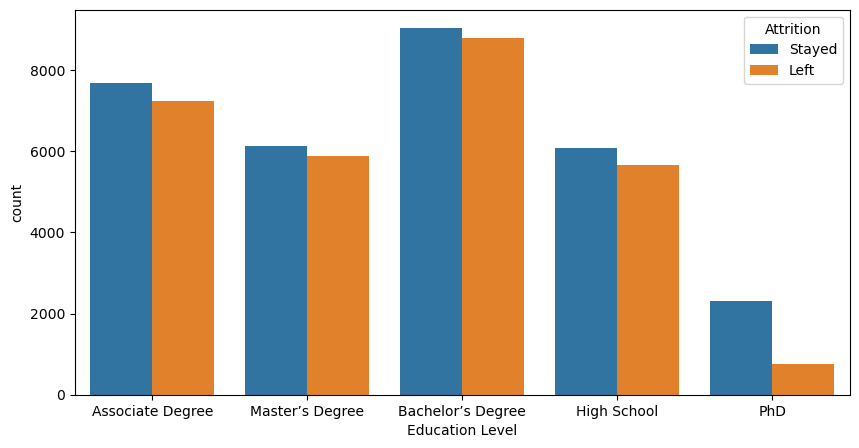

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Education Level', hue='Attrition')
plt.show()

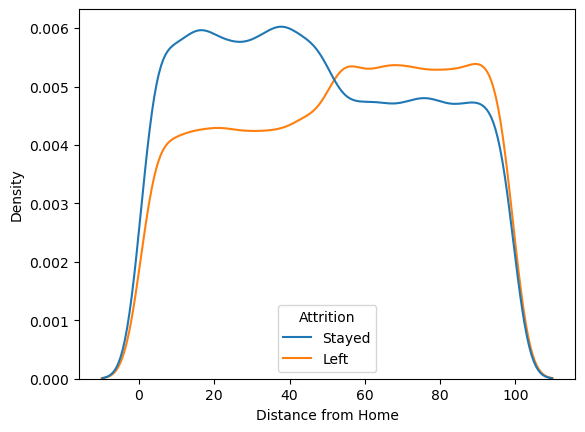

In [44]:
sns.kdeplot(data=df, x='Distance from Home', hue='Attrition')
plt.show()


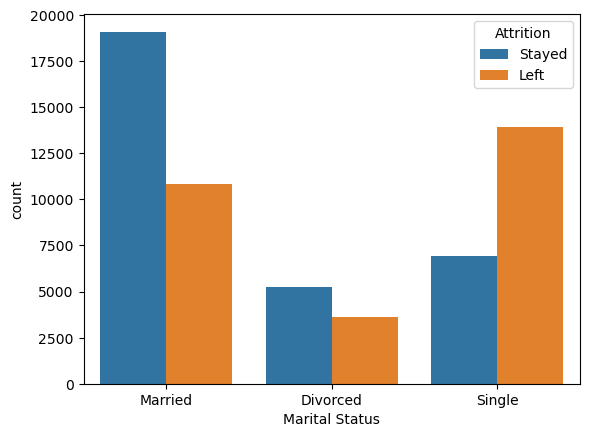

In [45]:
sns.countplot(data=df, x='Marital Status', hue='Attrition')
plt.show()

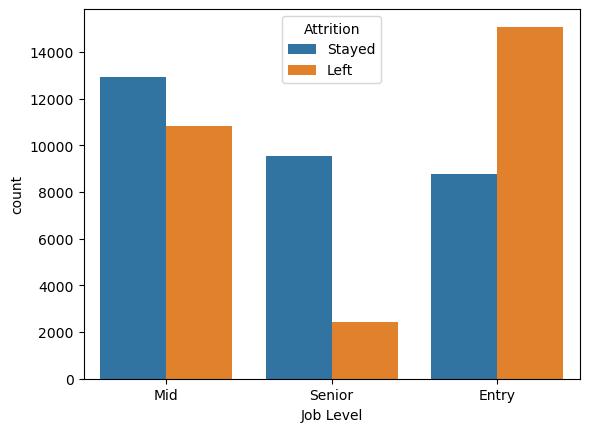

In [46]:
sns.countplot(data=df, x='Job Level', hue='Attrition')
plt.show()

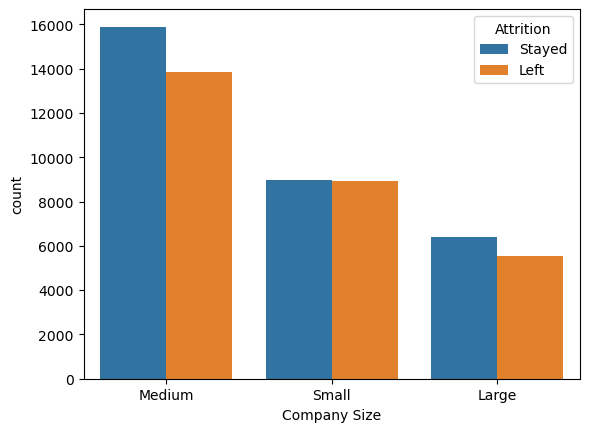

In [47]:
sns.countplot(data=df, x='Company Size', hue='Attrition')
plt.show()

In [11]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column)+ ' : '+ str(data[column].unique()))
        print(data[column].value_counts())

Gender : ['Male' 'Female']
Gender
Male      32739
Female    26859
Name: count, dtype: int64
Job Role : ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
Work-Life Balance : ['Excellent' 'Poor' 'Good' 'Fair']
Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
Job Satisfaction : ['Medium' 'High' 'Very High' 'Low']
Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
Performance Rating : ['Average' 'Low' 'High' 'Below Average']
Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
Overtime : ['No' 'Yes']
Overtime
No     40148
Yes    19450
Name: count, dtype: int64
Education Level : ['Associate Degree' 'Master’s Degree' 'Bachelor’s Deg

In [21]:
from sklearn.preprocessing import LabelEncoder

In [24]:
columns=['Gender', 'Monthly Income', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
le =LabelEncoder()
data[columns]=data[columns].apply(le.fit_transform)

In [25]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [27]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,2611,0,2,0,2,...,1,0,1,1,0,0,0,0,2,1
1,64756,59,0,4,3,2755,3,0,3,3,...,0,3,1,1,0,0,0,1,1,1
2,30257,24,0,10,2,5380,2,0,3,0,...,1,3,1,1,0,0,0,3,1,1
3,65791,36,0,7,0,1212,2,0,2,1,...,2,2,1,2,1,0,0,2,2,1
4,65026,56,1,41,0,2042,1,3,0,0,...,0,0,2,1,0,0,0,1,2,1


In [28]:
y=data.Attrition
y.tail()

59593    0
59594    0
59595    1
59596    0
59597    1
Name: Attrition, dtype: int64

In [29]:
columns=['Gender', 'Monthly Income', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
X=data[columns]
X.head()

,Gender,Monthly Income,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,1,2611,0,0,2,0,0,0,1,1,1,0,0,0,0,2,1
1,0,2755,3,3,0,3,0,3,0,1,1,0,0,0,1,1,1
2,0,5380,2,2,0,3,0,1,1,1,1,0,0,0,3,1,1
3,0,1212,0,2,0,2,0,2,2,1,2,1,0,0,2,2,1
4,1,2042,0,1,3,0,1,2,0,2,1,0,0,0,1,2,1


In [30]:
X_train, X_test ,y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [100]:
#pip install xgboost

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb_model = XGBClassifier()

In [20]:
xgb_model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Left' 'Stayed']

In [104]:
y_pred = xgb_model.predict(X_test)

In [165]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7096
           1       1.00      1.00      1.00      7804

    accuracy                           1.00     14900
   macro avg       1.00      1.00      1.00     14900
weighted avg       1.00      1.00      1.00     14900



In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [73]:
Model=DecisionTreeClassifier()

In [74]:
Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred=Model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 65.68%


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7096
           1       1.00      1.00      1.00      7804

    accuracy                           1.00     14900
   macro avg       1.00      1.00      1.00     14900
weighted avg       1.00      1.00      1.00     14900



In [114]:
confusion_m =confusion_matrix(y_test, y_pred)
confusion_m

array([[7096,    0],
       [   0, 7804]], dtype=int64)

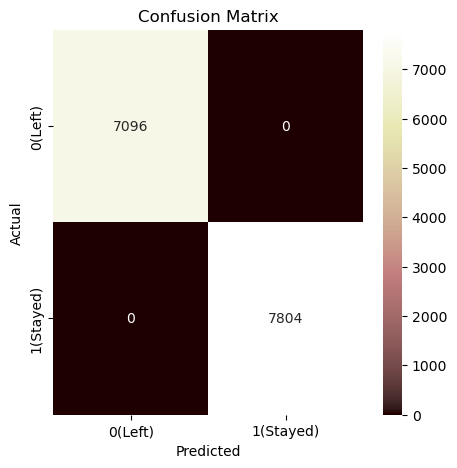

In [115]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_m, 
            annot=True, 
            fmt='d', 
            cmap='pink',
            xticklabels=['0(Left)', '1(Stayed)'],
            yticklabels=['0(Left)', '1(Stayed)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [116]:
!pip install catboost

In [77]:
from catboost import CatBoostClassifier

In [78]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)


In [79]:
model.fit(X_train, y_train)

0:	learn: 0.6591008	total: 174ms	remaining: 2m 53s
1:	learn: 0.6333834	total: 196ms	remaining: 1m 37s
2:	learn: 0.6127304	total: 219ms	remaining: 1m 12s
3:	learn: 0.5972958	total: 241ms	remaining: 1m
4:	learn: 0.5835385	total: 264ms	remaining: 52.5s
5:	learn: 0.5725102	total: 286ms	remaining: 47.4s
6:	learn: 0.5633876	total: 308ms	remaining: 43.7s
7:	learn: 0.5564145	total: 329ms	remaining: 40.9s
8:	learn: 0.5489823	total: 351ms	remaining: 38.6s
9:	learn: 0.5430458	total: 376ms	remaining: 37.2s
10:	learn: 0.5380221	total: 401ms	remaining: 36s
11:	learn: 0.5331771	total: 428ms	remaining: 35.2s
12:	learn: 0.5288384	total: 451ms	remaining: 34.3s
13:	learn: 0.5246765	total: 473ms	remaining: 33.3s
14:	learn: 0.5217563	total: 495ms	remaining: 32.5s
15:	learn: 0.5187457	total: 517ms	remaining: 31.8s
16:	learn: 0.5157707	total: 539ms	remaining: 31.2s
17:	learn: 0.5133243	total: 560ms	remaining: 30.5s
18:	learn: 0.5107155	total: 581ms	remaining: 30s
19:	learn: 0.5083534	total: 606ms	remaining: 

168:	learn: 0.4494210	total: 4.55s	remaining: 22.4s
169:	learn: 0.4492316	total: 4.59s	remaining: 22.4s
170:	learn: 0.4490638	total: 4.61s	remaining: 22.4s
171:	learn: 0.4489204	total: 4.64s	remaining: 22.3s
172:	learn: 0.4486843	total: 4.66s	remaining: 22.3s
173:	learn: 0.4484935	total: 4.69s	remaining: 22.2s
174:	learn: 0.4483198	total: 4.71s	remaining: 22.2s
175:	learn: 0.4481317	total: 4.75s	remaining: 22.2s
176:	learn: 0.4479789	total: 4.78s	remaining: 22.2s
177:	learn: 0.4478275	total: 4.81s	remaining: 22.2s
178:	learn: 0.4476384	total: 4.83s	remaining: 22.2s
179:	learn: 0.4474923	total: 4.86s	remaining: 22.1s
180:	learn: 0.4473161	total: 4.89s	remaining: 22.1s
181:	learn: 0.4471574	total: 4.91s	remaining: 22.1s
182:	learn: 0.4469796	total: 4.94s	remaining: 22s
183:	learn: 0.4468149	total: 4.97s	remaining: 22s
184:	learn: 0.4466543	total: 5s	remaining: 22s
185:	learn: 0.4464812	total: 5.02s	remaining: 22s
186:	learn: 0.4463287	total: 5.05s	remaining: 22s
187:	learn: 0.4461463	tot

329:	learn: 0.4255604	total: 8.89s	remaining: 18.1s
330:	learn: 0.4254161	total: 8.92s	remaining: 18s
331:	learn: 0.4252809	total: 8.95s	remaining: 18s
332:	learn: 0.4251352	total: 8.97s	remaining: 18s
333:	learn: 0.4250169	total: 8.99s	remaining: 17.9s
334:	learn: 0.4249025	total: 9.01s	remaining: 17.9s
335:	learn: 0.4247647	total: 9.03s	remaining: 17.9s
336:	learn: 0.4246391	total: 9.05s	remaining: 17.8s
337:	learn: 0.4245122	total: 9.08s	remaining: 17.8s
338:	learn: 0.4243774	total: 9.1s	remaining: 17.7s
339:	learn: 0.4242360	total: 9.13s	remaining: 17.7s
340:	learn: 0.4241782	total: 9.15s	remaining: 17.7s
341:	learn: 0.4240556	total: 9.17s	remaining: 17.6s
342:	learn: 0.4239237	total: 9.19s	remaining: 17.6s
343:	learn: 0.4238129	total: 9.21s	remaining: 17.6s
344:	learn: 0.4236588	total: 9.23s	remaining: 17.5s
345:	learn: 0.4235578	total: 9.26s	remaining: 17.5s
346:	learn: 0.4234344	total: 9.28s	remaining: 17.5s
347:	learn: 0.4232851	total: 9.3s	remaining: 17.4s
348:	learn: 0.423177

490:	learn: 0.4053621	total: 12.6s	remaining: 13s
491:	learn: 0.4052284	total: 12.6s	remaining: 13s
492:	learn: 0.4050685	total: 12.6s	remaining: 13s
493:	learn: 0.4049616	total: 12.6s	remaining: 12.9s
494:	learn: 0.4048580	total: 12.7s	remaining: 12.9s
495:	learn: 0.4047378	total: 12.7s	remaining: 12.9s
496:	learn: 0.4046574	total: 12.7s	remaining: 12.8s
497:	learn: 0.4045460	total: 12.7s	remaining: 12.8s
498:	learn: 0.4044649	total: 12.7s	remaining: 12.8s
499:	learn: 0.4043566	total: 12.8s	remaining: 12.8s
500:	learn: 0.4042441	total: 12.8s	remaining: 12.7s
501:	learn: 0.4041493	total: 12.8s	remaining: 12.7s
502:	learn: 0.4040439	total: 12.8s	remaining: 12.7s
503:	learn: 0.4039287	total: 12.9s	remaining: 12.7s
504:	learn: 0.4038057	total: 12.9s	remaining: 12.6s
505:	learn: 0.4037090	total: 12.9s	remaining: 12.6s
506:	learn: 0.4035881	total: 12.9s	remaining: 12.6s
507:	learn: 0.4034681	total: 12.9s	remaining: 12.5s
508:	learn: 0.4033193	total: 13s	remaining: 12.5s
509:	learn: 0.403231

651:	learn: 0.3877685	total: 16.4s	remaining: 8.77s
652:	learn: 0.3876770	total: 16.5s	remaining: 8.75s
653:	learn: 0.3875470	total: 16.5s	remaining: 8.72s
654:	learn: 0.3874395	total: 16.5s	remaining: 8.7s
655:	learn: 0.3873463	total: 16.6s	remaining: 8.68s
656:	learn: 0.3872672	total: 16.6s	remaining: 8.66s
657:	learn: 0.3871614	total: 16.6s	remaining: 8.64s
658:	learn: 0.3870154	total: 16.6s	remaining: 8.61s
659:	learn: 0.3869523	total: 16.7s	remaining: 8.59s
660:	learn: 0.3868876	total: 16.7s	remaining: 8.56s
661:	learn: 0.3867903	total: 16.7s	remaining: 8.54s
662:	learn: 0.3866785	total: 16.7s	remaining: 8.51s
663:	learn: 0.3866004	total: 16.8s	remaining: 8.49s
664:	learn: 0.3864716	total: 16.8s	remaining: 8.46s
665:	learn: 0.3863506	total: 16.8s	remaining: 8.44s
666:	learn: 0.3862344	total: 16.8s	remaining: 8.41s
667:	learn: 0.3861625	total: 16.9s	remaining: 8.38s
668:	learn: 0.3860635	total: 16.9s	remaining: 8.36s
669:	learn: 0.3859902	total: 16.9s	remaining: 8.34s
670:	learn: 0

815:	learn: 0.3711350	total: 21s	remaining: 4.74s
816:	learn: 0.3710363	total: 21.1s	remaining: 4.72s
817:	learn: 0.3709408	total: 21.1s	remaining: 4.69s
818:	learn: 0.3708481	total: 21.1s	remaining: 4.67s
819:	learn: 0.3707903	total: 21.1s	remaining: 4.64s
820:	learn: 0.3707037	total: 21.2s	remaining: 4.61s
821:	learn: 0.3706133	total: 21.2s	remaining: 4.59s
822:	learn: 0.3705097	total: 21.2s	remaining: 4.56s
823:	learn: 0.3704098	total: 21.3s	remaining: 4.54s
824:	learn: 0.3703137	total: 21.3s	remaining: 4.51s
825:	learn: 0.3702020	total: 21.3s	remaining: 4.49s
826:	learn: 0.3700807	total: 21.3s	remaining: 4.46s
827:	learn: 0.3700138	total: 21.4s	remaining: 4.44s
828:	learn: 0.3699215	total: 21.4s	remaining: 4.41s
829:	learn: 0.3698330	total: 21.4s	remaining: 4.39s
830:	learn: 0.3697290	total: 21.4s	remaining: 4.36s
831:	learn: 0.3696153	total: 21.5s	remaining: 4.33s
832:	learn: 0.3695159	total: 21.5s	remaining: 4.31s
833:	learn: 0.3694235	total: 21.5s	remaining: 4.29s
834:	learn: 0.

974:	learn: 0.3567029	total: 25.8s	remaining: 661ms
975:	learn: 0.3566203	total: 25.8s	remaining: 635ms
976:	learn: 0.3565350	total: 25.8s	remaining: 608ms
977:	learn: 0.3564225	total: 25.9s	remaining: 582ms
978:	learn: 0.3563108	total: 25.9s	remaining: 555ms
979:	learn: 0.3562192	total: 25.9s	remaining: 529ms
980:	learn: 0.3561331	total: 25.9s	remaining: 503ms
981:	learn: 0.3560454	total: 26s	remaining: 476ms
982:	learn: 0.3559726	total: 26s	remaining: 450ms
983:	learn: 0.3558872	total: 26s	remaining: 423ms
984:	learn: 0.3557914	total: 26.1s	remaining: 397ms
985:	learn: 0.3557074	total: 26.1s	remaining: 370ms
986:	learn: 0.3555722	total: 26.1s	remaining: 344ms
987:	learn: 0.3555085	total: 26.1s	remaining: 317ms
988:	learn: 0.3554215	total: 26.2s	remaining: 291ms
989:	learn: 0.3553529	total: 26.2s	remaining: 264ms
990:	learn: 0.3552519	total: 26.2s	remaining: 238ms
991:	learn: 0.3551734	total: 26.2s	remaining: 212ms
992:	learn: 0.3550780	total: 26.3s	remaining: 185ms
993:	learn: 0.3550

In [80]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 1]


In [81]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 75.14%


In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [131]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

In [132]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [135]:
y_pred = adaboost.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


In [166]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [138]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.1 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.4 MB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8

In [139]:
from lightgbm import LGBMClassifier

In [141]:
lgb_clf = LGBMClassifier()


In [142]:
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31324, number of negative: 28274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 59598, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525588 -> initscore=0.102442
[LightGBM] [Info] Start training from score 0.102442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

In [143]:
y_pred = lgb_clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


In [167]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [147]:
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [148]:
y_pred = gb_clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


In [168]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [150]:
from sklearn.linear_model import Perceptron

In [151]:
perceptron = Perceptron()


In [152]:
perceptron.fit(X_train, y_train)


Perceptron()

In [153]:
y_pred = perceptron.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [154]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 48.02%


In [155]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [156]:
qda = QuadraticDiscriminantAnalysis()

In [157]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [158]:
y_pred = qda.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [159]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 47.62%


In [160]:
from sklearn.linear_model import RidgeClassifier

In [161]:
ridge_clf = RidgeClassifier(alpha=1.0)

In [162]:
ridge_clf.fit(X_train, y_train)

RidgeClassifier()

In [163]:
y_pred = ridge_clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


In [164]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()


In [35]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 1]


In [37]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 1]


In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74
